# Using Multiple Correspondence Analysis (MCA) on ADNI Dataset

## Some explanation:

As per https://en.wikipedia.org/wiki/Multiple_correspondence_analysis, we can use MCA when we have a large set of categorical variables.
In our case:
        we have categorical (in the form of 54 SNPs - boolean) making up the genetic data.

"MCA can be viewed as an extension of simple correspondence analysis (CA) in that it is applicable to a large set of categorical variables."

## Importing Stuff:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from prince.prince.mca import MCA

## Reading the Dataset:

In [2]:
unique = pd.read_pickle("./DATA/Linearly_Transformed_Unique_Dataset.pkl")
print(unique.shape)
unique.head(15)

(1302, 209)


,PTID,MRID,Date,Age,Sex,DLICV_baseline,APOE4_Alleles,APOE_Genotype,Diagnosis_nearest_2.0,MUSE_Volume_4,...,rs111278892,rs3752246,rs4147929,rs41289512,rs3865444,rs6024870,rs6014724,rs7274581,rs429358,Diagnosis_nearest_2.0_cat
0,002_S_0295,002_S_0295_2006-04-18,2006-04-18,84.742466,0,1485405.375,1.0,E3/E4,CN,-401.428503,...,1,1,1,0,0,0,0,0,1,0
9,002_S_0413,002_S_0413_2006-05-02,2006-05-02,76.283562,1,1364116.000,0.0,E3/E3,CN,596.355045,...,0,1,1,0,1,0,0,0,0,0
24,002_S_0559,002_S_0559_2006-05-23,2006-05-23,79.223288,0,1570479.625,1.0,E3/E4,CN,224.874560,...,0,0,0,0,1,0,0,0,0,0
31,002_S_0619,002_S_0619_2006-06-01,2006-06-01,77.447945,0,1859348.250,2.0,E4/E4,Dementia,2633.277779,...,0,0,0,1,1,0,0,0,2,1
45,002_S_0729,002_S_0729_2006-07-17,2006-07-17,65.056164,1,1166961.750,1.0,E3/E4,MCI,256.289641,...,0,0,0,1,1,0,0,0,1,2
64,002_S_0816,002_S_0816_2006-08-30,2006-08-30,70.767123,0,1444128.125,2.0,E4/E4,Dementia,-126.260419,...,0,0,0,0,1,0,0,0,2,1
69,002_S_0938,002_S_0938_2006-10-05,2006-10-05,82.167123,1,1309685.000,0.0,E3/E3,Dementia,200.102369,...,0,1,1,0,1,0,0,0,0,1
74,002_S_0954,002_S_0954_2006-10-10,2006-10-10,69.198630,1,1075661.500,1.0,E3/E4,MCI,-60.539913,...,2,1,1,0,1,0,0,0,1,2
81,002_S_0955,002_S_0955_2006-10-11,2006-10-11,78.161644,1,1363607.000,1.0,E3/E4,Dementia,1058.028132,...,1,0,0,0,1,0,0,0,1,1
84,002_S_1018,002_S_1018_2006-11-29,2006-11-29,70.658904,1,1355603.000,0.0,E3/E3,Dementia,-485.048304,...,1,1,1,0,0,0,0,0,0,1


## Employ MCA:

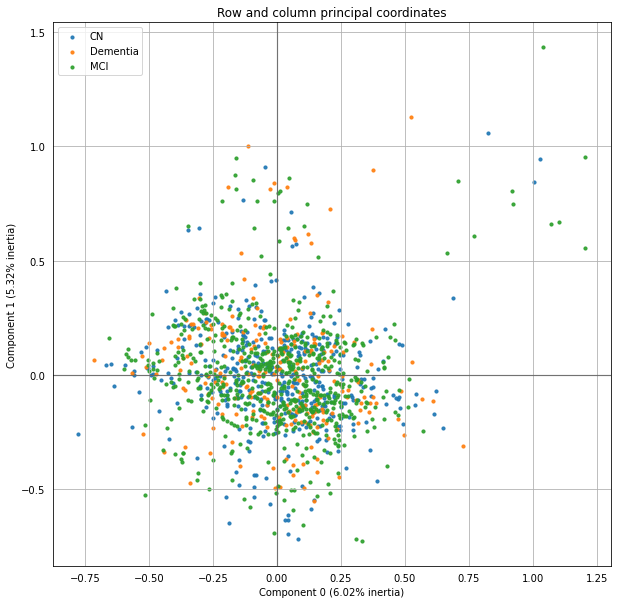

In [27]:
# First get the data to train on:
l = list(unique.columns)
columns_to_train_on = l[l.index("rs4575098"):l.index("rs429358")+1]

# The prince MCA algorithm needs string type for categorical data:
X = unique[columns_to_train_on].astype("string")

# Get the labels after
Y = unique["Diagnosis_nearest_2.0"].astype("string")

# Number of components is the number to which the dimension will be reduced
# Default checks input, copies dataset
# Needs to be in pandas or np.ndarray format
mca = MCA(n_components=54, n_iter=30) # 54 -> 2
mca.fit(X,y=Y)

# Make a visualization using the inherited method from CA:
ax = mca.plot_coordinates(X, ax=None, figsize=(10, 10), x_component=0, y_component=1, show_row_points=True, 
                          row_points_size=10, row_points_alpha=0.9, row_groups=list(Y), show_row_labels=False,
                          show_column_points=False, column_points_size=30, show_column_labels=False,
                          legend_n_cols=1)
plt.show()

In [36]:
print(mca.explained_inertia_)

[6.02454730e-02 5.31694854e-02 5.09388883e-02 4.69150576e-02
 4.54496353e-02 4.07079132e-02 3.84390275e-02 3.50823438e-02
 3.29532524e-02 3.24746485e-02 2.69383572e-02 2.45800019e-02
 2.23595746e-02 2.11398140e-02 1.81056225e-02 1.50076936e-02
 1.36279975e-02 1.34577204e-02 1.17571578e-02 1.07688218e-02
 1.02872931e-02 8.68520848e-03 8.35061404e-03 7.85965922e-03
 6.78260040e-03 6.59534347e-03 5.73954841e-03 5.02484024e-03
 4.78911551e-03 3.31676226e-03 2.33533391e-03 1.71552790e-03
 1.57595879e-03 1.23301850e-03 5.40333519e-04 4.19294979e-04
 2.22372163e-04 1.92156584e-04 1.40650872e-04 5.03654235e-05
 3.54728088e-05 3.28853714e-05 1.51021508e-05 2.22559456e-07
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


In [24]:
transformed_genetic_data = mca.transform(X)
columns = ["Component " + str(x) for x in list(transformed_genetic_data.columns)]
transformed_genetic_data.columns = columns
print(transformed_genetic_data.shape)
transformed_genetic_data.head()

(1302, 2)


,Component 0,Component 1
0,0.132943,0.044290
1,0.058932,-0.170031
2,0.017555,0.118130
3,-0.267468,-0.007547
4,-0.022810,-0.052599
